In [1]:
# This code installs the yfinance library, which allows you to access financial data from Yahoo Finance
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 10.5 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [2]:
# Import the yfinance library and assign it to the alias 'yf'
import yfinance as yf

# Create a list of tickers for the stocks you want to retrieve data for
list_tickers = ['CL=F','^GSPC', '^TNX', 'XOM']

# Use the Tickers() function from yfinance to create an object for each ticker in the list
tickers = yf.Tickers(list_tickers)

# Use the download() function from yfinance to download the stock data for the specified date range
data = yf.download(list_tickers,  start="2007-06-01", end="2022-07-01")

# Extract the 'Close' column from the dataframe
data = data['Close']

# Print the dataframe
data


[*********************100%***********************]  4 of 4 completed


,CL=F,XOM,^GSPC,^TNX
Date,,,,
2007-06-01,65.080002,84.220001,1536.339966,4.956
2007-06-04,66.209999,84.220001,1539.180054,4.929
2007-06-05,65.610001,84.260002,1530.949951,4.976
2007-06-06,65.959999,83.620003,1517.380005,4.970
2007-06-07,66.930000,81.959999,1490.719971,5.099
...,...,...,...,...
2022-06-24,107.620003,86.900002,3911.739990,3.125
2022-06-27,109.570000,89.029999,3900.110107,3.194
2022-06-28,111.760002,91.500000,3821.550049,3.206


In [3]:
# Remove all rows with missing values (NaN) from the dataframe
data = data.dropna()

# Check if the dataframe still contains any missing values
# returns False if there is no missing values
data.isnull().values.any()

False

In [4]:
# Select specific columns from the dataframe
data = data[['CL=F','^GSPC', '^TNX', 'XOM']]

# Import numpy and train_test_split function from sklearn
import numpy as np
from sklearn.model_selection import train_test_split

# Split the data into a training and test set, with a 80/20 split
# test_size = 0.2 means 20% of the data will be used for testing
training_set, test_set = train_test_split(data, test_size=0.2)

# Convert the training and test sets to numpy arrays
training_set = training_set.values
test_set = test_set.values

In [5]:
# Import the StandardScaler class from the sklearn.preprocessing module
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler class
sc = StandardScaler()

# Fit the StandardScaler to the training set and transform it
# This centers and scales the data so that the mean is 0 and the standard deviation is 1
training_set_scaled = sc.fit_transform(training_set)

# Apply the same scaling to the test set
test_set_scaled = sc.transform(test_set)

In [6]:
test_set_scaled.shape

(759, 4)

In [7]:
# Extract all columns from the training set except for the last column and assign to X_train
X_train = training_set_scaled[:,:-1]
# Extract the last column from the training set and assign to y_train
y_train = training_set_scaled[:,-1]
X_train, y_train

(array([[ 0.96385071, -0.49364843, -0.33915318],
        [ 1.00675789,  2.37877885,  0.24177319],
        [ 1.09551718, -0.90656843, -0.44252887],
        ...,
        [ 1.44382364, -0.49016939,  0.42829902],
        [ 0.8902352 , -0.59486588, -0.76164517],
        [ 1.53132101, -0.79151557,  1.25979912]]),
 array([1.04155989, 0.52594696, 0.09755852, ..., 0.69969343, 0.85796492,
        0.84671034]))

In [8]:
# Select all rows and all columns except for the last one in the test set to be used as the independent variables
X_test = test_set_scaled[:,:-1]
# Select all rows and only the last column in the test set to be used as the dependent variable
y_test = test_set_scaled[:,-1]

In [9]:
import numpy as np
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [10]:
from tensorflow import keras
import numpy as np
import tensorflow as tf

In [11]:
num_unique_vals = [len(np.unique(X_train[:, i])) for i in range(X_train.shape[1])]
num_units = [min(1000, i * 2) for i in num_unique_vals]
num_inputs = X_train.shape[-2]

In [13]:
# Activation Functions
def relu(x, weight, bias):
  """ReLU activation."""
  return tf.nn.relu(weight * (x - bias))

def relu_n(x, n = 1):
  """ReLU activation clipped at n."""
  return tf.clip_by_value(x, 0, n)

def exu(x, weight, bias):
  """ExU hidden unit modification."""
  return tf.exp(weight) * (x - bias)

def create_nam_model(x_train,
                     dropout,
                     feature_dropout = 0.0,
                     num_basis_functions = 1000,
                     units_multiplier = 2,
                     activation = 'exu',
                     name_scope = 'model',
                     shallow = False,
                     trainable = True):
  """Create the NAM model."""
  num_unique_vals = [
      len(np.unique(x_train[:, i])) for i in range(x_train.shape[1])
  ]
  num_units = [
      min(num_basis_functions, i * units_multiplier) for i in num_unique_vals
  ]
  num_inputs = x_train.shape[-2]
  nn_model = NAM(
      num_inputs=num_inputs,
      num_units=num_units,
      dropout=np.float32(dropout),
      feature_dropout=np.float32(feature_dropout),
      activation=activation,
      shallow=shallow,
      trainable=trainable,
      name_scope=name_scope)
  return nn_model

class ActivationLayer(tf.keras.layers.Layer):
  """Custom activation Layer to support ExU hidden units."""

  def __init__(self,
               num_units,
               name = None,
               activation = 'exu',
               trainable = True):
    """Initializes ActivationLayer hyperparameters.

    Args:
      num_units: Number of hidden units in the layer.
      name: The name of the layer.
      activation: Activation to use. The default value of `None` corresponds to
        using the ReLU-1 activation with ExU units while `relu` would use
        standard hidden units with ReLU activation.
      trainable: Whether the layer parameters are trainable or not.
    """
    super(ActivationLayer, self).__init__(trainable=trainable, name=name)
    self.num_units = num_units
    self._trainable = trainable
    if activation == 'relu':
      self._activation = relu
      self._beta_initializer = 'glorot_uniform'
    elif activation == 'exu':
      self._activation = lambda x, weight, bias: relu_n(exu(x, weight, bias))
      self._beta_initializer = tf.initializers.truncated_normal(
          mean=4.0, stddev=0.5)
    else:
      raise ValueError('{} is not a valid activation'.format(activation))

  def build(self, input_shape):
    """Builds the layer weight and bias parameters."""
    self._beta = self.add_weight(
        name='beta',
        shape=[input_shape[-1], self.num_units],
        initializer=self._beta_initializer,
        trainable=self._trainable)
    self._c = self.add_weight(
        name='c',
        shape=[1, self.num_units],
        initializer=tf.initializers.truncated_normal(stddev=0.5),
        trainable=self._trainable)
    super(ActivationLayer, self).build(input_shape)

  @tf.function
  def call(self, x):
    """Computes the output activations."""
    center = tf.tile(self._c, [tf.shape(x)[0], 1])
    out = self._activation(x, self._beta, center)
    return out


class FeatureRNN(tf.keras.layers.Layer):

  def __init__(self,
               num_units,
               dropout = 0.5,
               trainable = True,
               shallow = False,
               feature_num = 0,
               name_scope = 'model',
               activation = 'exu'):

    super(FeatureRNN, self).__init__()
    self._num_units = num_units
    self._dropout = dropout
    self._trainable = trainable
    self._tf_name_scope = name_scope
    self._feature_num = feature_num
    self._shallow = shallow
    self._activation = activation

  def build(self, input_shape):
    """Builds the feature net layers."""
    self.hidden_layers = [
        ActivationLayer(
            self._num_units,
            trainable=self._trainable,
            activation=self._activation,
            name='activation_layer_{}'.format(self._feature_num))
    ]
    if not self._shallow:
      self._h1 = tf.keras.layers.LSTM(
          64,
          return_sequences=True,
          trainable=self._trainable,
          name='h1_{}'.format(self._feature_num))
      self._h2 = tf.keras.layers.LSTM(
          32,
          trainable=self._trainable,
          name='h2_{}'.format(self._feature_num))
      self.hidden_layers += [self._h1, self._h2]
    self.linear = tf.keras.layers.Dense(
        1,
        use_bias=False,
        trainable=self._trainable,
        name='dense_{}'.format(self._feature_num),
        kernel_initializer='glorot_uniform')
    super(FeatureRNN, self).build(input_shape)

  @tf.function
  def call(self, x, training):
    """Computes FeatureNN output with either evaluation or training mode."""
    with tf.name_scope(self._tf_name_scope):
      for l in self.hidden_layers:
        x = tf.nn.dropout(
            l(x), rate=0.05)
      x = tf.squeeze(self.linear(x), axis=1)
    return x


class NAM(tf.keras.Model):

  def __init__(self,
               num_inputs,
               num_units,
               trainable = True,
               shallow = False,
               feature_dropout = 0.0,
               dropout = 0.0,
               **kwargs):

    super(NAM, self).__init__()
    self._num_inputs = num_inputs
    if isinstance(num_units, list):
      assert len(num_units) == num_inputs
      self._num_units = num_units
    elif isinstance(num_units, int):
      self._num_units = [num_units for _ in range(self._num_inputs)]
    self._trainable = trainable
    self._shallow = shallow
    self._feature_dropout = feature_dropout
    self._dropout = dropout
    self._kwargs = kwargs

  def build(self, input_shape):
    self.feature_rnns = [None] * self._num_inputs
    for i in range(self._num_inputs):
      self.feature_rnns[i] = FeatureRNN(
          num_units=self._num_units[i],
          dropout=self._dropout,
          trainable=self._trainable,
          shallow=self._shallow,
          feature_num=i,
          **self._kwargs)
    self._bias = self.add_weight(
        name='bias',
        initializer=tf.keras.initializers.Zeros(),
        shape=(1,),
        trainable=self._trainable)
    self._true = tf.constant(True, dtype=tf.bool)
    self._false = tf.constant(False, dtype=tf.bool)

  def call(self, x, training = True):
    """Computes NAM output by adding the outputs of individual feature nets."""
    individual_outputs = self.calc_outputs(x, training=training)
    stacked_out = tf.stack(individual_outputs, axis=-1)
    training = self._true if training else self._false
    dropout_out = tf.nn.dropout(
        stacked_out,
        rate=tf.cond(training, lambda: self._feature_dropout, lambda: 0.0))
    out = tf.reduce_sum(dropout_out, axis=-1)
    return out + self._bias

  def _name_scope(self):
    """Overrides the default function to fix name_scope for bias."""
    tf_name_scope = self._kwargs.get('name_scope', None)
    name_scope = super(NAM, self)._name_scope()
    if tf_name_scope:
      return tf_name_scope + '/' + name_scope
    else:
      return name_scope

  def calc_outputs(self, x, training = True):
    """Returns the output computed by each feature net."""
    training = self._true if training else self._false
    list_x = tf.split(x, self._num_inputs, axis=-2)
    return [
        self.feature_rnns[i](x_i, training=training)
        for i, x_i in enumerate(list_x)
    ]
  
  def score(self, x, y):
        # Compute model performance metric
        y_pred = self.predict(x)
        return np.mean(y_pred == y)  # Example metric: mean accuracy

In [14]:
tf.compat.v1.reset_default_graph()
namrnn_model = create_nam_model(
    x_train=X_train,
    dropout=0.0,
    num_basis_functions=64,
    activation='relu',
    trainable=True,
    shallow=False,
    name_scope='model')

_ = namrnn_model(X_train[:1])
namrnn_model.summary()

Model: "nam"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_rnn (FeatureRNN)    multiple                  45600     
                                                                 
 feature_rnn_1 (FeatureRNN)  multiple                  45600     
                                                                 
 feature_rnn_2 (FeatureRNN)  multiple                  45600     
                                                                 
Total params: 136,801
Trainable params: 136,801
Non-trainable params: 0
_________________________________________________________________


In [15]:
namrnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
                    loss= tf.keras.losses.MeanSquaredError(),)

In [16]:
namrnn_model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


95/95 [==============================] - 15s 16ms/step - loss: 0.2422
Epoch 2/100
95/95 [==============================] - 2s 17ms/step - loss: 0.1534
Epoch 3/100
95/95 [==============================] - 2s 20ms/step - loss: 0.1308
Epoch 4/100
95/95 [==============================] - 2s 23ms/step - loss: 0.1210
Epoch 5/100
95/95 [==============================] - 2s 17ms/step - loss: 0.1183
Epoch 6/100
95/95 [==============================] - 2s 17ms/step - loss: 0.1105
Epoch 7/100
95/95 [==============================] - 2s 16ms/step - loss: 0.1091
Epoch 8/100
95/95 [==============================] - 2s 16ms/step - loss: 0.1079
Epoch 9/100
95/95 [==============================] - 2s 16ms/step - loss: 0.1055
Epoch 10/100
95/95 [==============================] - 2s 16ms/step - loss: 0.1057
Epoch 11/100
95/95 [==============================] - 2s 24ms/step - loss: 0.1030
Epoch 12/100
95/95 [==============================] - 2s 18ms/step - loss: 0.1022
Epoch 13/100
95/95 [================

In [17]:
namrnn_model.evaluate(X_test,y_test)

24/24 [==============================] - 1s 8ms/step - loss: 0.0762


0.07617073506116867

In [18]:
predicted_stock_price = namrnn_model.predict(X_test)
y_pred = predicted_stock_price
y_test = np.reshape(y_test, (759,1))
predicted_stock_price = np.reshape(predicted_stock_price, (759,1))
print("y_test.shape=",y_test.shape,
      "y_pred.shape=",predicted_stock_price.shape)

24/24 [==============================] - 1s 7ms/step
y_test.shape= (759, 1) y_pred.shape= (759, 1)


Uncomment to code below only if you want to plot the real and predicted values. Otherwise you will see the normalized real and normalized predicted values

In [19]:
# # Inverse scaling the training and test set
# training_set_original = sc.inverse_transform(training_set_scaled)
# test_set_original = sc.inverse_transform(test_set_scaled)

# # Extracting the independent and dependent variables for the training set
# # X_train contains all columns except the last column
# X_train = training_set_original[:,:-1]
# # y_train contains only the last column
# y_train = training_set_original[:,-1]

# # Extracting the independent and dependent variables for the test set
# # X_test contains all columns except the last column
# X_test = test_set_original[:,:-1]
# # y_test contains only the last column
# y_test = test_set_original[:,-1]

# # Inverse scaling the predicted stock price
# predicted_stock_price = y_pred*sc.scale_[-1]+sc.mean_[-1]

In [20]:
from sklearn import metrics as sk_metrics

def rmse(y_true, y_pred):
  """Root mean squared error between true and predicted values."""
  return float(np.sqrt(sk_metrics.mean_squared_error(y_true, y_pred)))

def mae(y_true, y_pred):
  """Mean Absolute Error between true and predicted values."""
  return float(sk_metrics.mean_absolute_error(y_true, y_pred)) 
def mse(y_true, y_pred):
  """Mean squared error between true and predicted values."""
  return float(sk_metrics.mean_squared_error(y_true, y_pred))

def r2_score(y_true, y_pred):
  """R-squared score between true and predicted values."""
  return float(sk_metrics.r2_score(y_true, y_pred)) 
  
def sigmoid(x):
  """Sigmoid function."""
  if isinstance(x, list):
    x = np.array(x)
  return np.where(x >= 0, 1 / (1 + np.exp(-x)), np.exp(x) / (1 + np.exp(x)))

def calculate_metric(y_true,
                     predictions,
                     regression = True):
  """Calculates the evaluation metric."""
  if regression:
    return rmse(y_true, predictions)
  else:
    return sk_metrics.roc_auc_score(y_true, sigmoid(predictions))

In [21]:
test_metric = calculate_metric(
    y_test, predicted_stock_price, regression=True)
print(test_metric)

0.2784876866925208


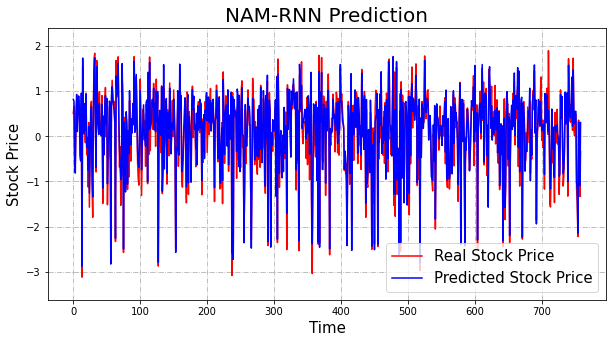

In [22]:
import matplotlib.pyplot as plt

# Set the size of the plot figure to 10x5 inches
plt.figure(figsize=(10, 5))
# Show a grid on the plot
plt.grid(visible=True, linestyle='-.') 
# Plot the actual stock prices in red
plt.plot(y_test, color = 'red', label = 'Real Stock Price')
# Plot the predicted stock prices in blue
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
# Add a title to the plot
plt.title('NAM-RNN Prediction', fontsize=20)
# Add a label to the x-axis
plt.xlabel('Time', fontsize=15)
# Add a label to the y-axis
plt.ylabel('Stock Price', fontsize=15)
# Add a legend to the plot
plt.legend(fontsize=15)
# Set the limits of the y-axis to ensure all actual and predicted stock prices are visible
plt.ylim(bottom=min(y_test) - (max(y_test) - min(y_test))*0.1, top=max(y_test) + (max(y_test) - min(y_test))*0.1)

# Save the plot as a PNG file
# plt.savefig("NAM-RNN.png")

plt.show()
# from google.colab import files
# plt.savefig('nam-rnn.png')
# files.download('nam-rnn.png')

In [23]:
import numpy as np
from sklearn.metrics import r2_score

y_pred = predicted_stock_price

# Calculate the baseline performance
baseline_r2 = r2_score(y_test, y_pred)

# Initialize a list to store the feature importance scores
permutation_scores = []

# Iterate over each feature
for feature in range(X_train.shape[1]):
    # Shuffle the values of the current feature
    X_train_shuffled = X_train.copy()
    X_train_shuffled[:, feature] = np.random.permutation(X_train[:, feature])

    # Re-fit the model and make predictions
    namrnn_model.fit(X_train_shuffled, y_train)
    y_pred_shuffled = namrnn_model.predict(X_test)

    # Calculate the decrease in performance
    r2 = r2_score(y_test, y_pred_shuffled)
    permutation_score = baseline_r2 - r2
    permutation_scores.append(permutation_score)

# normalize the feature importance to sum to 1
permutation_scores = np.array(permutation_scores)
permutation_scores /= permutation_scores.sum()

24/24 [==============================] - 0s 7ms/step


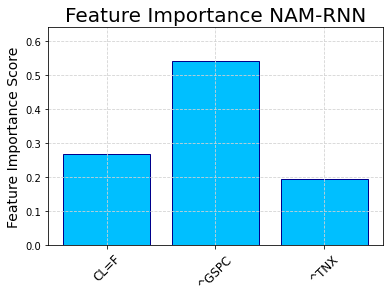

In [25]:
# Create a bar plot with x-axis values ranging from 0 to the number of columns in the X_train array
# and y-axis values set to permutation_scores, using blue color for bars and dark blue for edges.
plt.bar(range(X_train.shape[1]), permutation_scores, color='#00BFFF', edgecolor='#00008B')

# Set the x-ticks for the plot to be the names of the columns in the original data, rotated 45 degrees,
# and with a font size of 12.
plt.xticks(range(X_train.shape[1]), data.columns, rotation=45, fontsize=12)

# Set the title for the plot to "Feature Importance NAM-RNN", with a font size of 20.
plt.title('Feature Importance NAM-RNN', fontsize=20)

# Set the label for the y-axis to "Feature Importance Score", with a font size of 14.
plt.ylabel('Feature Importance Score', fontsize=14)

# Set the y-axis limits to be between 0 and the maximum value of permutation_scores plus 0.1.
plt.ylim(0, max(permutation_scores)+0.1)

# Display a grid with dashed lines in a light gray color.
plt.grid(visible=True, linestyle='--', color='#D3D3D3')

# Save the plot as an image file named "feature_importance NAM-RNN.png",
# with the plot boundaries tightly cropped.
# plt.savefig('feature_importance NAM-RNN.png', bbox_inches='tight')

plt.show()